# Import Library

In [796]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Load Dataset

In [797]:
gps = pd.read_csv('googleplaystore.csv')
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Understanding

Eksplorasi dataset menggunakan fungsi info()

In [798]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Cek jumlah baris dan kolom

In [799]:
gps.shape

(10841, 13)

Mengubah kolom Content Rating menjadi Content_Rating

In [800]:
gps.rename(columns={'Content Rating': 'Content_Rating'}, inplace=True)

Cek jumlah entri unik berdasarkan App, Category, Rating, Type, Content_Rating, dan Genres menggunakan fungsi unique()

In [801]:
print('Jumlah data pada App:', len(gps.App.unique()))
print('Jumlah data pada Category:', len(gps.Category.unique()))
print('Jumlah data pada Rating:', len(gps.Rating.unique()))
print('Jumlah data pada Type:', len(gps.Type.unique()))
print('Jumlah data pada Content Rating:', len(gps.Content_Rating.unique()))
print('Jumlah data pada Genres:', len(gps.Genres.unique()))

Jumlah data pada App: 9660
Jumlah data pada Category: 34
Jumlah data pada Rating: 41
Jumlah data pada Type: 4
Jumlah data pada Content Rating: 7
Jumlah data pada Genres: 120


Membagi fitur pada dataset menjadi dua bagian, yaitu data kategori dan data numerik

In [802]:
categorical_features = ['App', 'Category', 'Type', 'Content_Rating', 'Genres']
numerical_features = ['Rating']

Data Category

In [803]:
feature = categorical_features[1]
count = gps[feature].value_counts()
percent = 100*gps[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase': percent.round(1)})

print("\nExploration for feature:", feature)
print(df)


Exploration for feature: Category
                     Jumlah sampel  Persentase
FAMILY                        1972        18.2
GAME                          1144        10.6
TOOLS                          843         7.8
MEDICAL                        463         4.3
BUSINESS                       460         4.2
PRODUCTIVITY                   424         3.9
PERSONALIZATION                392         3.6
COMMUNICATION                  387         3.6
SPORTS                         384         3.5
LIFESTYLE                      382         3.5
FINANCE                        366         3.4
HEALTH_AND_FITNESS             341         3.1
PHOTOGRAPHY                    335         3.1
SOCIAL                         295         2.7
NEWS_AND_MAGAZINES             283         2.6
SHOPPING                       260         2.4
TRAVEL_AND_LOCAL               258         2.4
DATING                         234         2.2
BOOKS_AND_REFERENCE            231         2.1
VIDEO_PLAYERS            

Data Category dengan visualiasi bar plot

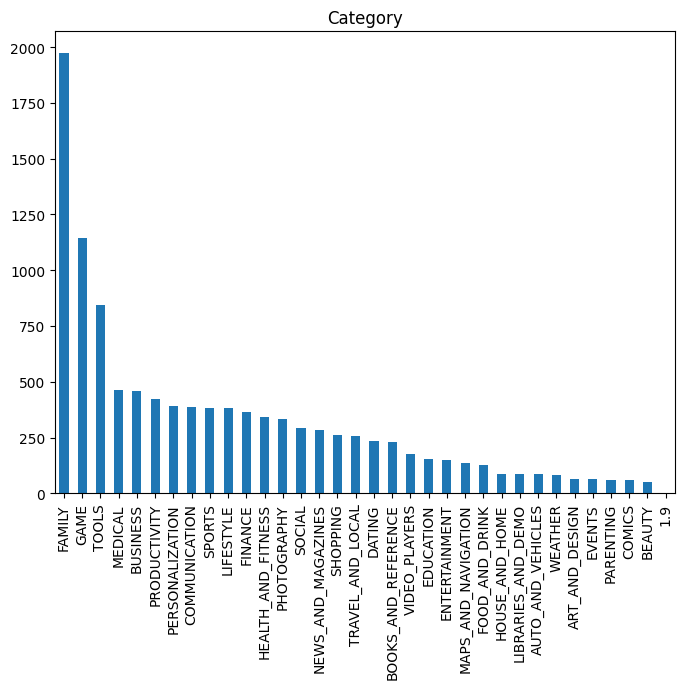

In [804]:
plt.figure(figsize=(8, 6))
count.plot(kind='bar', title=str(feature))
plt.show()

Data Type

In [805]:
feature = categorical_features[2]
count = gps[feature].value_counts()
percent = 100*gps[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase': percent.round(1)})

print("\nExploration for feature:", feature)
print(df)


Exploration for feature: Type
      Jumlah sampel  Persentase
Free          10039        92.6
Paid            800         7.4
0                 1         0.0


Data Type dengan visualiasi pie

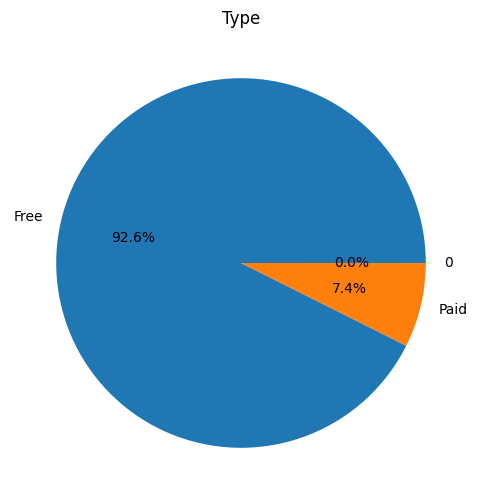

In [806]:
plt.figure(figsize=(8, 6))
gps['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type')
plt.ylabel('')
plt.show()

Data Content_Rating

In [807]:
feature = categorical_features[3]
count = gps[feature].value_counts()
percent = 100*gps[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase': percent.round(1)})

print("\nExploration for feature:", feature)
print(df)


Exploration for feature: Content_Rating
                 Jumlah sampel  Persentase
Everyone                  8714        80.4
Teen                      1208        11.1
Mature 17+                 499         4.6
Everyone 10+               414         3.8
Adults only 18+              3         0.0
Unrated                      2         0.0


Data Content_Ranting dengan visualiasi bar plot

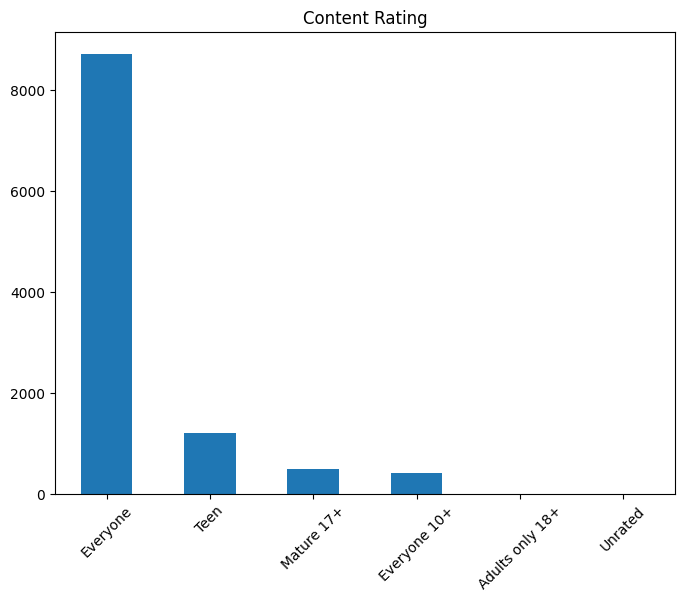

In [808]:
plt.figure(figsize=(8, 6))
gps['Content_Rating'].value_counts().plot(kind='bar')
plt.title('Content Rating')
plt.xticks(rotation=45)
plt.show()

Data Genres

In [809]:
feature = categorical_features[4]
count = gps[feature].value_counts()
percent = 100*gps[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase': percent.round(1)})

print("\nExploration for feature:", feature)
print(df)


Exploration for feature: Genres
                        Jumlah sampel  Persentase
Tools                             842         7.8
Entertainment                     623         5.7
Education                         549         5.1
Medical                           463         4.3
Business                          460         4.2
...                               ...         ...
Arcade;Pretend Play                 1         0.0
Card;Brain Games                    1         0.0
Lifestyle;Pretend Play              1         0.0
Comics;Creativity                   1         0.0
Strategy;Creativity                 1         0.0

[120 rows x 2 columns]


Data Genres dengan visualisasi bar plot

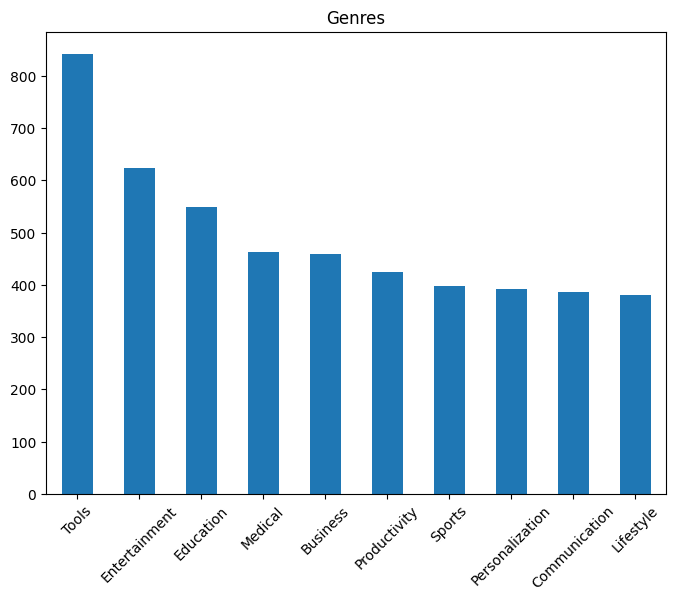

In [810]:
plt.figure(figsize=(8, 6))
gps['Genres'].value_counts().head(10).plot(kind='bar')
plt.title('Genres')
plt.xticks(rotation=45)
plt.show()

Data numerik

In [811]:
gps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Data Rating dengan visualisasi histogram

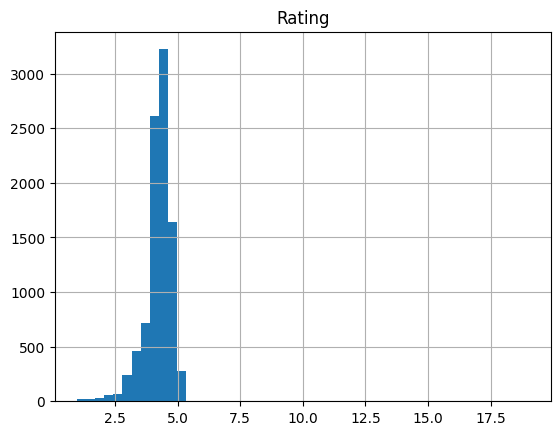

In [812]:
gps.hist(bins=50)
plt.show()

# Data Preparation

Cek outlier dengan boxplot

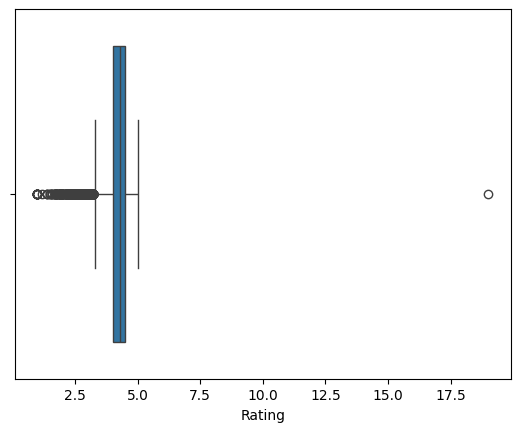

In [813]:
gps1=gps.select_dtypes(exclude=['object'])
for column in gps1:
        plt.figure()
        sns.boxplot(data=gps1, x=column)

Cek unique data untuk melihat keberadaan outlier

In [814]:
gps['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Tampilkan data outlier

In [815]:
gps[gps['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Hapus 1 data outlier

In [816]:
gps.drop(gps.index[10472], axis=0, inplace=True)

Cek data duplikat

In [817]:
gps.duplicated().sum()

483

Hapus data duplikat

In [818]:
gps.drop_duplicates(inplace=True)
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content_Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Cek nilai yang hilang

In [819]:
gps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Visualisasi nilai yang hilang

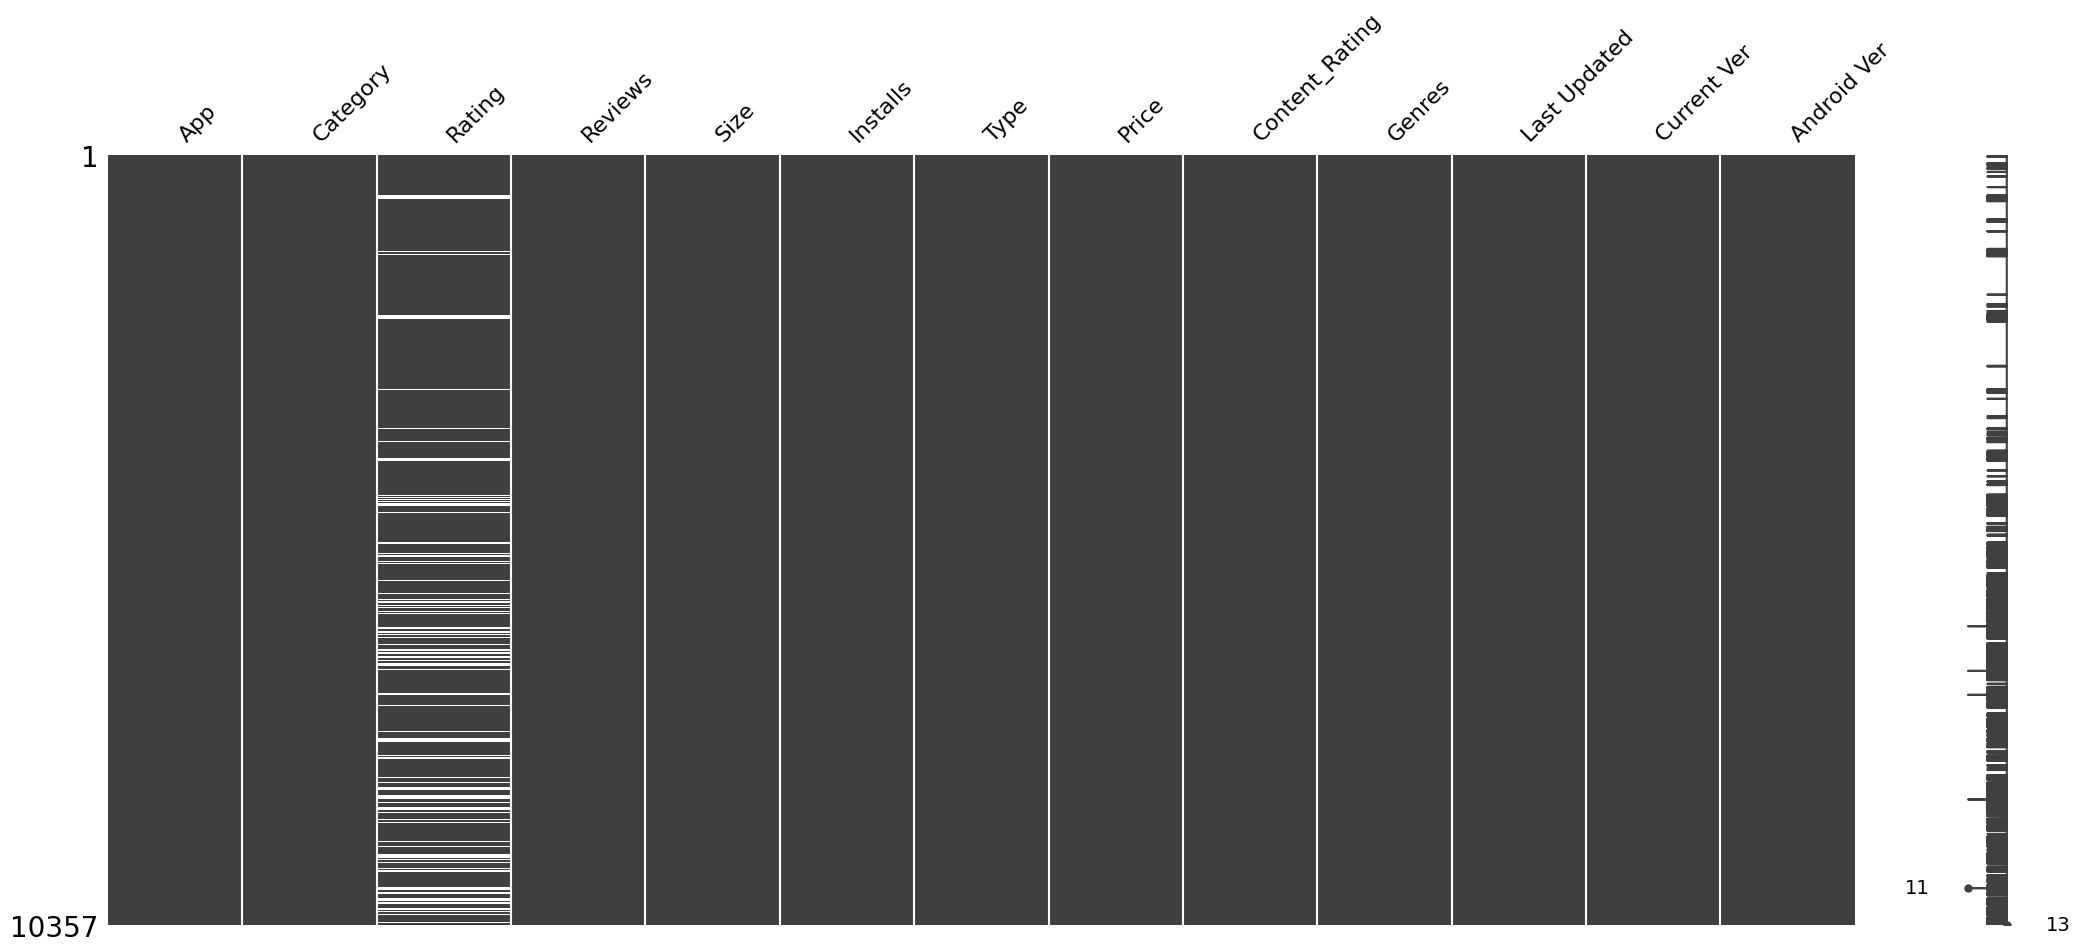

In [820]:
sorted_null = msno.nullity_sort(gps)
figures = msno.matrix(sorted_null)

Membersihkan nilai yang hilang menggunakan fungsi dropna()

In [821]:
gps = gps.dropna()
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content_Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


Menghapus Last Updated dan Current Ver

In [822]:
gps.drop(['Last Updated', 'Current Ver'], inplace=True, axis=1)
gps.head()

<ipython-input-822-9af5b41592ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps.drop(['Last Updated', 'Current Ver'], inplace=True, axis=1)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up


# Modeling

## Cosine Similarity

Ekstrak fitur Genres dengan TF-IDF Vectorizer

In [823]:
tfid = TfidfVectorizer()

tfid.fit(gps['Genres'])

tfid.get_feature_names_out()

array(['action', 'adventure', 'arcade', 'art', 'audio', 'auto', 'beauty',
       'board', 'books', 'brain', 'business', 'card', 'casino', 'casual',
       'comics', 'communication', 'creativity', 'dating', 'demo',
       'design', 'drink', 'editors', 'education', 'educational',
       'entertainment', 'events', 'finance', 'fitness', 'food', 'games',
       'health', 'home', 'house', 'libraries', 'lifestyle', 'local',
       'magazines', 'maps', 'medical', 'music', 'navigation', 'news',
       'parenting', 'personalization', 'photography', 'play', 'players',
       'playing', 'pretend', 'productivity', 'puzzle', 'racing',
       'reference', 'role', 'shopping', 'simulation', 'social', 'sports',
       'strategy', 'tools', 'travel', 'trivia', 'vehicles', 'video',
       'weather', 'word'], dtype=object)

Melakukan fit lalu transformasikan ke bentuk matrix

In [824]:
tfidf_matrix = tfid.fit_transform(gps['Genres'])

tfidf_matrix.shape

(8886, 66)

Mengubah vektor tf-idf dalam bentuk matriks menggunakan fungsi todense()

In [825]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Melihat matriks tf-idf untuk nama App terhadap Genres

In [826]:
pd.DataFrame(tfidf_matrix.todense(), columns=tfid.get_feature_names_out(), index=gps.Genres).sample(22, axis=1).sample(10, axis=0)

,weather,games,adventure,auto,sports,action,reference,audio,casual,arcade,...,playing,photography,food,health,brain,play,lifestyle,communication,fitness,medical
Genres,,,,,,,,,,,,,,,,,,,,,
Social,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Tools,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Entertainment;Music & Video,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Health & Fitness,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.0,0.707107,0.0
Card;Action & Adventure,0.0,0.0,0.546008,0.0,0.0,0.448421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Food & Drink,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Simulation,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Tools,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
Travel & Local,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Cosine Similarity

In [827]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71961846, 1.        , 0.71961846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.71961846, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom

In [828]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=gps['App'], columns=gps['App'])
print('Shape:', cosine_sim_df.shape)

Shape: (8886, 8886)


Melihat similarity matrix

In [829]:
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

App,Webull - Stock Quotes & Free Stock Trading,BeyondMenu Food Delivery,Jewels Star: OZ adventure,Tinder,MARVEL Contest of Champions
App,,,,,
Pushbullet - SMS on PC,0.0,0.0,0.0,0.0,0.0
Shadow Fight 2,0.0,0.0,0.0,0.0,1.0
Telegram,0.0,0.0,0.0,0.0,0.0
Google Photos,0.0,0.0,0.0,0.0,0.0
Adobe Photoshop Fix,0.0,0.0,0.0,0.0,0.0


Membuat sejumlah top-N recommendation App pada pengguna yang diatur dalam parameter k

In [830]:
def app_recommendations(app_name, similarity_data=cosine_sim_df, items=gps[['App', 'Genres']], k=5):
    index = similarity_data.loc[:,app_name].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Mencari rekomendasi yang mirip dengan App

In [831]:
gps[gps.App.eq('EF Spelling Bee')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Android Ver
9287,EF Spelling Bee,FAMILY,3.0,2,9.4M,500+,Free,0,Everyone,Education;Education,4.3 and up


Mendapatkan rekomendasi yang mirip

In [832]:
app_recommendations('EF Spelling Bee')

,App,Genres
0,Timetable,Education
1,British Columbia License,Education
2,Starfall Free & Member,Education;Education
3,AP Calculus BC Practice Test,Education
4,Wifi BT Scanner,Education


Pengujian model menggunakan filter Type

In [781]:
tfid = TfidfVectorizer()
tfid.fit(gps['Type'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(gps['Type'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=gps[['App', 'Type']], k=5):

    index = similarity_data.loc[:,app_name].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [782]:
app_recommendations('EF Spelling Bee')

,App,Type
0,Timetable,Free
1,British Columbia License,Free
2,Starfall Free & Member,Free
3,AP Calculus BC Practice Test,Free
4,Wifi BT Scanner,Free


Pengujian model menggunakan filter Content_Rating

In [783]:
tfid = TfidfVectorizer()
tfid.fit(gps['Content_Rating'])
tfid.get_feature_names_out()
tfidf_matrix = tfid.fit_transform(gps['Content_Rating'])
tfidf_matrix.todense()
cosine_sim = cosine_similarity(tfidf_matrix)

def app_recommendations(app_name, similarity_data=cosine_sim_df, items=gps[['App', 'Content_Rating']], k=5):

    index = similarity_data.loc[:,app_name].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(app_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [784]:
app_recommendations('EF Spelling Bee')

,App,Content_Rating
0,Timetable,Everyone
1,British Columbia License,Everyone
2,Starfall Free & Member,Everyone
3,AP Calculus BC Practice Test,Everyone
4,Wifi BT Scanner,Everyone


## K-Nearest Neighbor

Menyimpan nama-nama aplikasi pada dataframe baru

In [785]:
app_name = pd.DataFrame({'App':gps['App']})
app_name.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


Menghapus fitur-fitur 'Type', 'Content_Rating', 'Genres', 'Android Ver

In [786]:
gps.drop(['Type',	'Content_Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)
gps.head()

<ipython-input-786-6129ec121d87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps.drop(['Type',	'Content_Rating',	'Genres',	'Android Ver'], inplace=True,axis=1)


,App,Category,Rating,Reviews,Size,Installs,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Menggunakan kolom App sebagai index

In [787]:
gps.set_index('App',inplace=True)
gps.head()

,Category,Rating,Reviews,Size,Installs,Price
App,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0


Melakukan proses encoding dengan fitur get_dummies.

In [788]:
gps = pd.concat([gps, pd.get_dummies(gps['Category'], prefix='Category')],axis=1)
gps.drop(['Category'], axis=1, inplace=True)
gps.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,3.9,967,14M,"500,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7M,"5,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menyesuaikan pada data kolom 'Size', 'Installs', dan 'Price' melakukan replace string dan mengubah tipe data agar bisa di-scaling

In [789]:
gps['Size']= gps['Size'].str.replace('M','000')
gps['Size'] = gps['Size'].str.replace('k','')
gps['Size'] = gps['Size'].replace("Varies with device",'0')
gps['Size'] = gps['Size'].astype('float')

for item in gps['Size']:
  if item < 10:
      gps['Size'] = gps['Size'].replace(item, item*1000)

gps['Size'] = gps['Size']/1000

gps['Installs'] = gps['Installs'].str.replace('+', '')
gps['Installs'] = gps['Installs'].str.replace(',', '')
gps['Installs'] = gps['Installs'].astype('int')

gps['Price'] = gps['Price'].str.replace('$', '')
gps['Price'] = gps['Price'].astype('float')

<ipython-input-789-fe4b38262251>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Installs'] = gps['Installs'].str.replace('+', '')
<ipython-input-789-fe4b38262251>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Price'] = gps['Price'].str.replace('$', '')


Mengubah sebuah kumpulan data menjadi skala mulai dari 0 (min) hingga 1 (max)

In [790]:
column_numeric = ['Reviews', 'Installs', 'Rating', 'Size', 'Price']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(gps[column_numeric])

i=0
for column in column_numeric:
    gps[column] = scaled[:,i]
    i += 1

gps.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.000002,0.190,0.00001,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coloring book moana,0.725,0.000012,0.140,0.00050,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.001120,0.087,0.00500,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sketch - Draw & Paint,0.875,0.002759,0.250,0.05000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,0.825,0.000012,0.028,0.00010,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Membuat model menggunakan NearestNeighbors menggunakan euclidean

In [791]:
model = NearestNeighbors(metric='euclidean')
model.fit(gps)

NearestNeighbors(metric='euclidean')

Membuat fungsi rekomendasi dengan menghitung skor distance

In [792]:
def RecommendedApps_model(appname:str, recommend_apps:int=5):
  print(f'Apabila pengguna menyukai aplikasi {appname[0]} Berikut ini adalah aplikasi yang juga mungkin akan disukai :')

  distances, neighbors = model.kneighbors(gps.loc[appname],n_neighbors=recommend_apps)
  similar_app = []

  for appname in app_name.loc[neighbors[0][:]].values:
    similar_app.append(appname[0])

  similar_distance = []

  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")

  return pd.DataFrame(data = {"App Name" : similar_app, "Similiarity Score" : similar_distance})

Memberikan rekomendasi terhadap aplikasi yang serupa

In [793]:
RecommendedApps_model(app_name.loc[100])

Apabila pengguna menyukai aplikasi Natural recipes for your beauty Berikut ini adalah aplikasi yang juga mungkin akan disukai :


,App Name,Similiarity Score
0,Hush - Beauty for Everyone,100.0%
1,Hairstyles step by step,99.99%
2,Tie - Always be happy,99.97%
3,Girls Hairstyles,99.96%
4,Mirror - Zoom & Exposure -,99.95%


# Evaluation

Metrik evaluasi algoritma pengelompokan menggunakan Calinski Harabasz Score

In [794]:
calinski_harabasz_score(gps, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7.4998974132315315

Metrik evaluasi algoritma pengelompokan menggunakan Davies Bouldin Score

In [795]:
davies_bouldin_score(gps, app_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.585735926526135